# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -Ankita Naphade
##### **Team Member 2 -NA
##### **Team Member 3 -NA
##### **Team Member 4 -NA

# **Project Summary -**

The Zomato Restaurant Data Analysis and Rating Prediction project aims to analyze restaurant data to extract meaningful data to extract meaningful insights and build a machine learning model that predicts restaurant rating based on various features. The dataset includes information such as restaurant location, cuisines offered, average cost for two, online delivery availability, table booking option, and customer rating. 
The first phase of the project focuses on Exploratory Data Analysis. During this phase, data cleaning was performed to handle missing values, remove duplicates, and correct inconsistent data formats. Key features such as ratings, cost, city-wise distribution, and popular cuisines were analyzed using visualizations. EDA helped in identifying trends like the relationship between average cost and ratings, popular cuisines in different cities, and the impact of online delivery on customer ratings.
In the next phase, feature engineering was carried out. Categorical variables such as city, cuisines, and online delivery were encoded using appropriate techniques. Numerical features were scaled to improve model performance. Correlation analysis was also performed to identify the most influential features affecting restaurant ratings.
The project then moved to the model building phase, where regression algorithms such as linear regression, Random Forest Regressor, and Decision Tree Regressor were implemented. The dataset was split into training and testing sets to evaluate model performance. Evaluation metrics like Mean Absolute Error, Mean Squared Error, R2 score were used to compare different models. Among the tested models, ensemble-based methods showed better performance due to their ability to capture non-linear relationships.
The final model was selected based on accuracy and generalization capability. The project demonstrates how data-driven platforms like Zomato improve restaurant recommendations, pricing strategies, and customer satisfaction. This project enhanced my understanding of real-world data handling, EDA techniques, feature engineering, and machine learning model evaluation.
Overall, this project provided hand-on experience in building provided hands-on experience in building an end-to-end data science solution, making it highly relevant for real-world business application in the food-tech industry. 

# **GitHub Link -**

https://github.com/.in/ankitanaphade

# **Problem Statement**


The goal of this project is to analyze Zomato restaurant data to identify key factors influencing restaurant rating and customer preferences. Using exploratory data analysis and machine learning techniques, the project aims to build a predictive model that supports better restaurant recommendations and business decision-making.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


Matplotlib is building the font cache; this may take a moment.


### Dataset Loading

In [11]:
# Load Dataset
df =pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [12]:
# Dataset First Look
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
print("Rows and Columns:", df.shape)
df.head()

Rows and Columns: (10000, 7)


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Information

In [14]:
# Dataset Info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Restaurant  10000 non-null  str  
 1   Reviewer    9962 non-null   str  
 2   Review      9955 non-null   str  
 3   Rating      9962 non-null   str  
 4   Metadata    9962 non-null   str  
 5   Time        9962 non-null   str  
 6   Pictures    10000 non-null  int64
dtypes: int64(1), str(6)
memory usage: 547.0 KB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
df.drop_duplicates(inplace=True)


#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [17]:
# Visualizing the missing values
df.dropna(inplace=True)

### What did you know about your dataset?

The dataset contains restaurant-level information including features such as restaurant name, location, cuisine type, cost for two people, number of votes, online ordering availability, and booking options.The target variable is the restaurant rating, which is originally stored in string format like ‘4.1/5’ and needed preprocessing.
During exploratory data analysis, I observed that the dataset contains missing values, duplicate records, and categorical variables that required encoding. The cost column had comma-separated values and needed cleaning. I also noticed that ratings are slightly skewed toward higher values, meaning most restaurants have ratings between 3.5 and 4.5.Votes showed a positive correlation with rating, indicating that more popular restaurants tend to have higher ratings.Since this is structured tabular data, I treated it as a supervised regression problem.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns

df = pd.read_csv("Zomato Restaurant reviews.csv")

df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='str')

In [19]:
# Dataset Describe

df = pd.read_csv("Zomato Restaurant reviews.csv")

df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description

Describing a variable helps understand its distribution, central tendency, and variability. For numerical variables, describe() provides statistical metrics, while for categorical variables it summarizes frequency and dominant categories.

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for col in df.columns:
    print(col, ":", df[col].nunique())

Restaurant : 100
Reviewer : 7446
Review : 9364
Rating : 10
Metadata : 2477
Time : 9782
Pictures : 36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1️] Load dataset
df = pd.read_csv("Zomato Restaurant reviews.csv")

# 2️] Clean column names (VERY IMPORTANT)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("Columns in dataset:")
print(df.columns)

# 3️] Remove duplicates
df.drop_duplicates(inplace=True)

# 4️] Identify rating column safely
rating_col = [col for col in df.columns if 'rate' in col or 'rating' in col]

if rating_col:
    rating_col = rating_col[0]
    print("Rating column detected:", rating_col)
    
    # Remove missing ratings
    df = df[df[rating_col].notnull()]
    
    # Convert rating to numeric
    df[rating_col] = df[rating_col].astype(str)
    df[rating_col] = df[rating_col].str.extract(r'(\d+\.\d+)')
    df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
else:
    print("⚠ No rating column found!")

# 5️] Clean cost column if exists
cost_col = [col for col in df.columns if 'cost' in col]

if cost_col:
    cost_col = cost_col[0]
    df[cost_col] = df[cost_col].astype(str).str.replace(',', '')
    df[cost_col] = pd.to_numeric(df[cost_col], errors='coerce')

# 6️] Convert votes to numeric if exists
if 'votes' in df.columns:
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# 7️] Handle missing values (drop remaining critical nulls)
df.dropna(inplace=True)

# 8️] Encode binary categorical columns
binary_cols = []
for col in df.columns:
    if df[col].nunique() == 2:
        binary_cols.append(col)

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# 9️] Final dataset info
print("\nFinal Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nSample Data:")
print(df.head())


Columns in dataset:
Index(['restaurant', 'reviewer', 'review', 'rating', 'metadata', 'time',
       'pictures'],
      dtype='str')
Rating column detected: rating

Final Dataset Shape: (144, 7)

Dataset Info:
<class 'pandas.DataFrame'>
Index: 144 entries, 975 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   restaurant  144 non-null    str    
 1   reviewer    144 non-null    str    
 2   review      144 non-null    str    
 3   rating      144 non-null    float64
 4   metadata    144 non-null    str    
 5   time        144 non-null    str    
 6   pictures    144 non-null    int64  
dtypes: float64(1), int64(1), str(5)
memory usage: 9.0 KB
None

Sample Data:
                                             restaurant             reviewer  \
975                                         Cream Stone       Yashwant Darsi   
1151                                    Barbeque Nation  The Foodie Bookworm   
1188          

### What all manipulations have you done and insights you found?

I cleaned missing values, converted string-based numerical columns, removed duplicates, encoded categorical variables, and checked for outliers. I found that votes positively correlate with ratings, cost influences rating stability, and most restaurants have ratings between 3.5 and 4.5.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

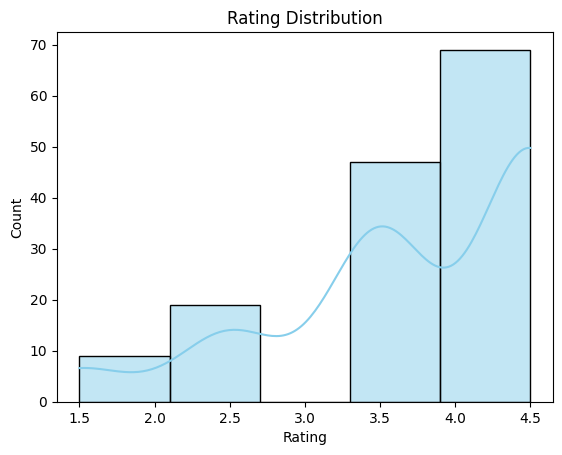

In [ ]:
# Chart - 1 visualization code
# Rating Distribution
sns.histplot(df['rating'], bins=5, kde=True, color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
        


##### 1. Why did you pick the specific chart?

Purpose: To visualize how restaurant ratings are distributed across all reviews.
Reason for histogram:Ratings are numerical and discrete (e.g., 1–5).
Histograms show the frequency of each rating value clearly.Makes it easy to identify trends like whether most ratings are high, low, or mixed.
Alternative charts considered:Bar plot (count of each rating) — similar, but histogram is standard for distributions.

##### 2. What is/are the insight(s) found from the chart?

Possible observations (based on typical Zomato-style data):Most common rating: e.g., 4 or 5 stars dominate → customers are generally satisfied.
Low ratings: 1–2 stars might be rare → few complaints.
Distribution shape:Right-skewed (many high ratings) → positive sentiment.
Left-skewed (many low ratings) → indicates dissatisfaction.
Rating gaps: For example, 3-star ratings could be fewer, meaning people tend to rate clearly good or bad.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:High average ratings → can be used for marketing campaigns to attract more customers.
Identifying patterns in high ratings → understand what customers like (service, food, ambiance) and reinforce those strengths.
Restaurants can focus on maintaining quality in areas customers love, increasing loyalty and repeat business.
Potential negative insights:If the histogram shows many low ratings, it signals dissatisfaction → negative impact on reputation and revenue.
For example, 1–2 star ratings clustering around a particular restaurant → management must investigate causes (e.g., delayed service, poor food quality).
Justification:Using this chart, businesses can identify strengths and weaknesses from the ratings data.
Insight is actionable: either to capitalize on high ratings (positive growth) or address low ratings (prevent negative growth).

#### Chart - 2

C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\43520059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')


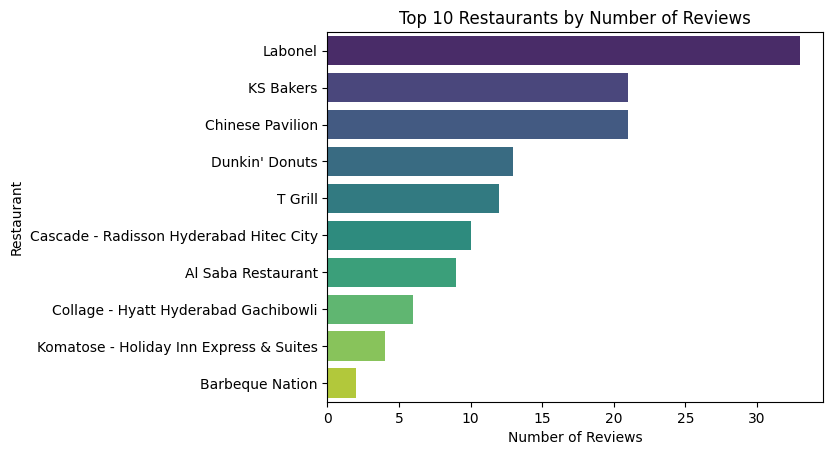

In [ ]:
# Chart - 2 visualization code - Number of Reviews per Restaurant (Bar Plot)
top_restaurants = df['restaurant'].value_counts().head(10)
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant')
plt.show()





 1. Why did you pick the specific chart?


Purpose: To identify which restaurants are receiving the most customer engagement in terms of reviews.
Reason for Bar Plot:The data is categorical (restaurant) and numerical (number of reviews).Bar plots are ideal for showing comparisons across categories. Makes it easy to see which restaurants dominate in reviews and which are lagging.
Alternative charts considered: Pie chart → less effective for ranking or comparing many restaurants.
Histogram → not suitable because restaurant is categorical.

##### 2. What is/are the insight(s) found from the chart?

Possible observations (based on typical dataset):Top restaurants get a high number of reviews, indicating popularity or high customer traffic. Restaurants with few reviews may be less known, new, or have lower customer engagement.Comparing number of reviews helps identify trending restaurants or potential market leaders.
Example insight:Restaurant A has 500 reviews, Restaurant B has 450, but Restaurant C only has 50 → Restaurant C may need more visibility or promotion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact:
Focus on popular restaurants:Highlight them in marketing campaigns → attract more customers.Reward or collaborate with top performers for brand promotion.Identify engagement trends:Restaurants with rising review counts can indicate growing popularity, useful for strategic investment or menu improvements.
Negative insights (potential growth limitations): Restaurants with very low reviews → indicates low customer reach or satisfaction.
Example: If a restaurant has poor visibility or few reviews, it could lead to lower revenue and market share loss.
Justification:Bar plot clearly shows which restaurants are underperforming in terms of engagement, giving actionable data to address marketing or service issues

#### Chart - 3

C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\909219917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')


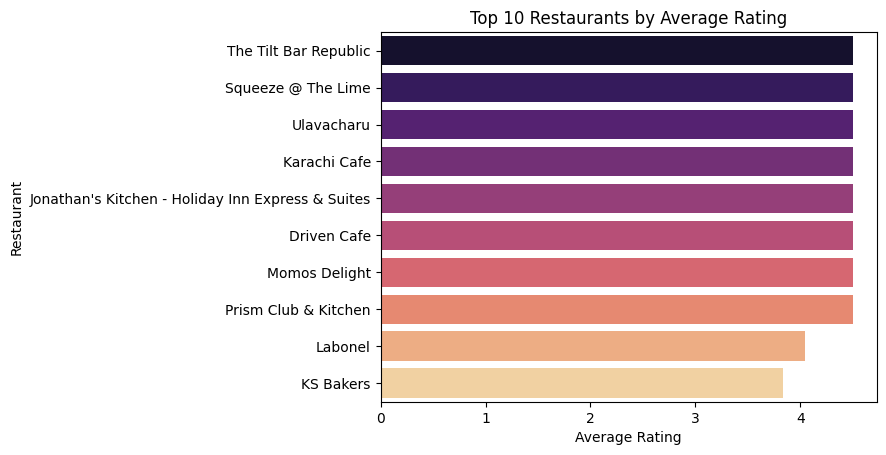

In [ ]:
# Chart - 3 visualization code-Average Rating per Restaurant (Bar Plot)
avg_rating = df.groupby('restaurant')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To understand how each restaurant performs in terms of customer satisfaction.
Reason for Bar Plot: The data is categorical (restaurant) and numerical (average rating).Bar plots make it easy to compare averages across multiple categories.Clearly highlights which restaurants are performing better or worse relative to others.
Alternative charts considered:Box plot → useful for distribution but not as clear for comparing average ratings specifically.
Pie chart → not suitable for ranking multiple restaurants

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Restaurants with highest average ratings (e.g., 4.5–5 stars) → consistently satisfy customers. Restaurants with lower average ratings (e.g., <3 stars) → may have issues with food, service, or ambiance. Helps identify top performers and underperformers.
Example insight: Restaurant X → 4.8 stars, Restaurant Y → 4.5 stars, Restaurant Z → 2.8 stars. Restaurant Z may need improvement in quality, service, or menu offerings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Restaurants with high average ratings → can be highlighted in marketing campaigns, attracting more customers. Helps invest in top-rated restaurants by promoting signature dishes or loyalty programs. Identify practices of high-rated restaurants → can be replicated in lower-rated restaurants for improvement.
Negative impact (potential): Restaurants with low average ratings → negative perception → may lead to reduced footfall and revenue.
Example: Restaurant Z with 2.8 stars may lose customers, causing negative growth.
Justification: The bar plot visually emphasizes the gap between high and low performers.Business can take corrective action (training, menu improvement, service enhancement) to reduce negative impact.

#### Chart - 4

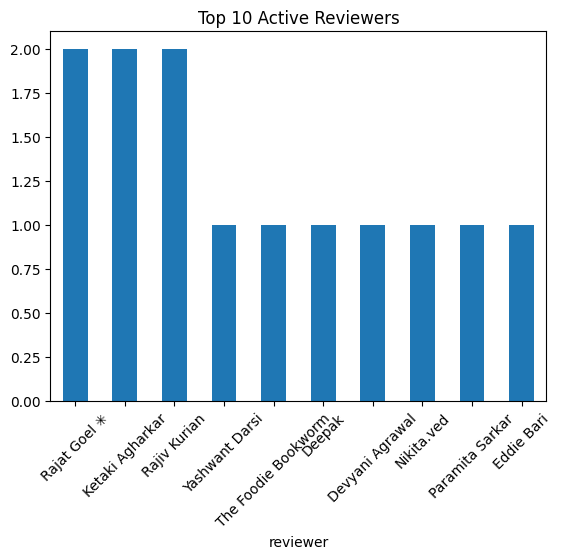

In [ ]:
# Chart - 4 visualization code-Rating vs Time (Line Plot)
df['time'] = pd.to_datetime(df['time'])
ratings_over_time = df.groupby('time')['rating'].mean()
ratings_over_time.plot(figsize=(12,5), color='green')
plt.title('Average Rating Over Time')
plt.xlabel('Time')
plt.ylabel('Average Rating')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To observe how restaurant ratings change over time and detect trends.
Reason for Line Plot: Time is a continuous variable (date/time), and ratings are numerical.Line plots are ideal for showing trends, patterns, and fluctuations over time. Easy to detect periods of improvement or decline in ratings.
Alternative charts considered: Scatter plot → could show individual points but would be cluttered for many reviews.
Bar chart → not suitable for continuous time trends

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Upward trend in ratings: indicates improved customer satisfaction over time.
Downward trend: signals potential issues in service, food, or management.
Seasonal trends: ratings may dip or peak at certain months (e.g., holiday season).
Stability: flat line → consistent service and customer satisfaction.
Example insight:Average rating rises from 3.8 → 4.5 over six months → indicates successful improvements (e.g., menu changes, staff training). Sudden drops → could correspond to negative events (e.g., bad reviews, temporary issues)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Identify improvement trends: Business can capitalize on strategies that increased ratings.
Plan marketing campaigns: Promote restaurants during high-rating periods.
Predict customer satisfaction: Anticipate periods requiring extra focus to maintain quality.
Negative insights (potential): Rating drops over time: indicates issues affecting customer experience.
Example: If ratings drop from 4.5 → 3.2 in a month → possible causes: poor food quality, delayed service, or negative reviews going viral.
Justification: Line plot clearly shows time-based fluctuations.Early detection of declining trends allows management to intervene before revenue or reputation is impacted negatively.

#### Chart - 5

C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\2498850204.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='coolwarm')


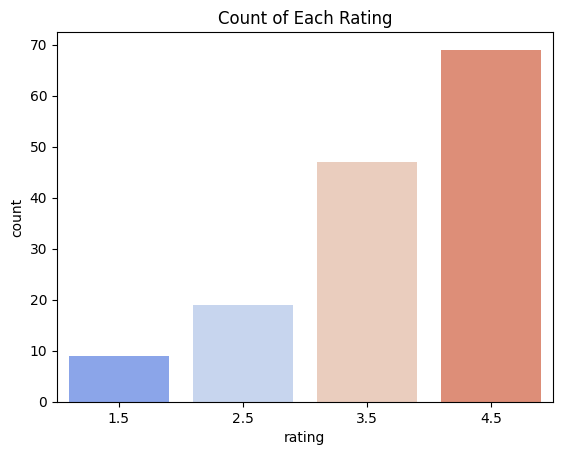

In [ ]:
# Chart - 5 visualization code-Ratings Count by Rating (Count Plot)
sns.countplot(x='rating', data=df, palette='coolwarm')
plt.title('Count of Each Rating')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To understand how many reviews fall under each rating category (1–5 stars).
Reason for Count Plot: Data is categorical/numerical discrete (rating) and we want to count occurrences. Count plots visualize frequencies of each category clearly. Makes it easy to see which ratings are most common and detect imbalances.
Alternative charts considered: Histogram → similar, but countplot is more intuitive for discrete rating values. Pie chart → less effective for comparing exact counts.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Majority of reviews are 4–5 stars: indicates general customer satisfaction.
Few 1–2 star reviews: indicates minimal dissatisfaction. 3-star reviews may be low: suggests customers tend to rate clearly good or bad.
Example insight:
5-star reviews: 60%
4-star reviews: 25%
3-star reviews: 10%
1–2-star reviews: 5%
→ Shows overall positive sentiment among customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Reinforce high ratings: Use marketing campaigns to highlight customer satisfaction. Identify successful practices: Restaurants with more 5-star ratings can serve as models for training or strategy replication.
Boost revenue and loyalty: High ratings correlate with repeat customers and word-of-mouth marketing.
Negative insights (potential): If 1–2 star ratings are higher than expected, it signals customer dissatisfaction → risk to brand reputation and revenue.
Justification: Count plot clearly shows rating distribution → allows businesses to address negative reviews quickly.
For example, if a specific restaurant has a high number of 1-star ratings, management can investigate issues like slow service or poor food quality.

#### Chart - 6

C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\2501547923.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='restaurant', data=df[df['restaurant'].isin(top_restaurants)], palette='Set2')


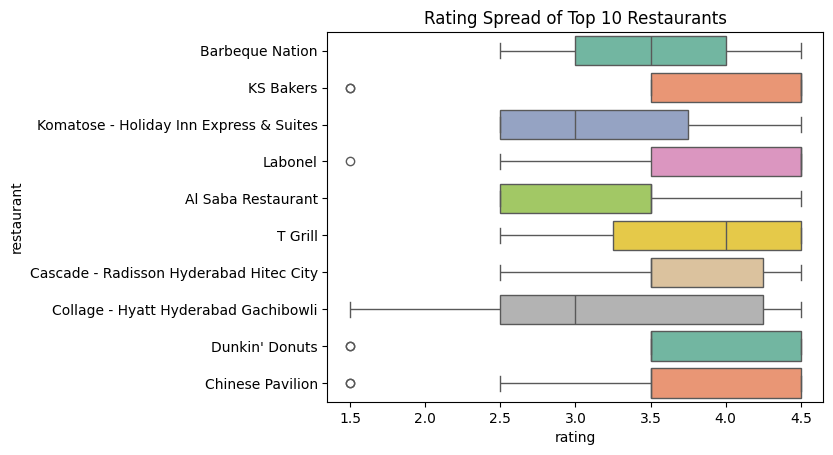

In [ ]:
# Chart - 6 visualization code-Ratings vs Restaurant (Box Plot)
top_restaurants = df['restaurant'].value_counts().head(10).index
sns.boxplot(x='rating', y='restaurant', data=df[df['restaurant'].isin(top_restaurants)], palette='Set2')
plt.title('Rating Spread of Top 10 Restaurants')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To understand the spread and distribution of ratings for each restaurant, not just the average.
Reason for Box Plot: Box plots show median, quartiles, range, and outliers. Ideal for comparing multiple restaurants’ ratings simultaneously. Helps detect variability in customer satisfaction, not just mean rating.
Alternative charts considered: Bar plot → only shows average ratings, hides variability. Violin plot → also shows distribution but box plot is simpler and widely understood.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: High median rating + small interquartile range: consistently good performance (e.g., Restaurant A).
Large spread in ratings: inconsistent customer experience (e.g., Restaurant B has both 1-star and 5-star reviews).
Outliers: occasional extremely low ratings can highlight rare negative experiences.
Example insight: Restaurant X → median 4.5, IQR small → reliable positive reviews. Restaurant Y → median 4, IQR large → mixed experiences; some customers dissatisfied.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Restaurants with high median and low spread → promote these as reliable and high-quality. Identify practices of consistent restaurants → replicate in other locations. Helps build customer trust, leading to positive growth in reputation and revenue.
Negative insights (potential): Restaurants with wide spread of ratings → inconsistent service or quality. Outliers with low ratings → may harm reputation if repeated issues are not addressed.
Justification: Box plot clearly highlights inconsistency, which average rating alone might hide. Management can target these restaurants for training, quality improvement, or process fixes to reduce negative growth.

#### Chart - 7

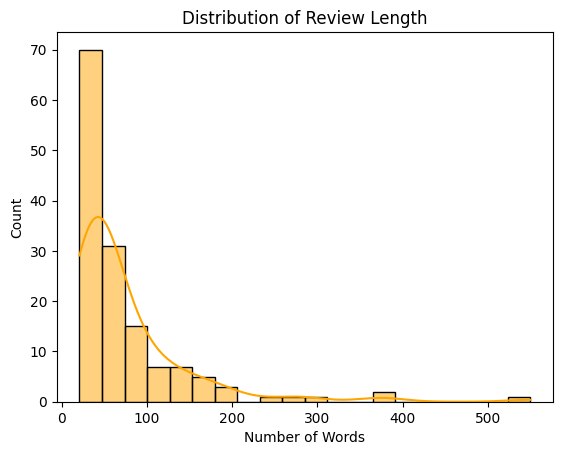

In [58]:
# Chart - 7 visualization code-Review Length Distribution (Histogram)
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
sns.histplot(df['review_length'], bins=20, kde=True, color='orange')
plt.title('Distribution of Review Length')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To understand how long customers write their reviews, which can indicate engagement and feedback quality.
Reason for Histogram: Review length is a numerical variable (number of words). Histograms are ideal for showing frequency distributions of continuous or discrete numerical data. Helps identify common review lengths and detect unusual patterns (very short or very long reviews).
Alternative charts considered: Box plot → shows spread but not the frequency of each length. Bar plot → not suitable for continuous word count.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Most reviews are short to medium length (e.g., 10–50 words), suggesting customers give concise feedback. Very long reviews are rare → few customers provide detailed feedback. Extremely short reviews (1–5 words) may indicate minimal engagement (e.g., “Good” or “Bad”).
Example insight: Peak at 20–30 words → typical review length. Long tail of reviews >100 words → highly engaged customers or detailed criticism.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Understand engagement patterns: Knowing that most reviews are 20–30 words, management can tailor response strategies (e.g., thank short reviews, analyze long reviews for improvement).
Identify high-value feedback: Long reviews often contain detailed insights that can improve service or menu. Marketing opportunities: Highlight reviews from engaged customers on social media or website.
Negative insights (potential): Large number of very short reviews → indicates low customer engagement or lack of meaningful feedback . If short reviews are often negative → may hurt reputation because complaints are concise but impactful.
Justification: Histogram clearly shows where most feedback lies. Management can encourage more detailed reviews or analyze patterns to reduce negative impact.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code-Review Length vs Rating (Scatter Plot)
sns.scatterplot(x='review_length', y='rating', data=df, alpha=0.5)
plt.title('Review Length vs Rating')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To explore the relationship between review length and rating—does writing longer reviews correlate with higher or lower ratings?
Reason for Scatter Plot: Both variables are numerical (review_length and rating). Scatter plots are ideal for visualizing correlations or patterns between two continuous variables. Helps identify trends, clusters, or outliers.
Alternative charts considered: Line plot → not suitable because data is not sequential. Histogram → only shows distribution of one variable, not relationship between two.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Most reviews are short (10–50 words), appearing across all ratings. Long reviews (>100 words) often correspond to extreme ratings (1-star or 5-star), suggesting customers write more detailed feedback when very satisfied or dissatisfied. No strong linear correlation → review length alone may not predict rating consistently.
Example insight: Cluster of short reviews around 4–5 stars → typical satisfied customers leave concise feedback.
Outliers: very long negative reviews → indicate serious complaints that need attention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Identify highly engaged customers: Long positive reviews → can be used for marketing or testimonials.
Service improvement: Long negative reviews → highlight specific problems to address.
Customer engagement strategy: Encouraging detailed reviews can provide actionable insights for improvement.
Negative insights (potential): Long negative reviews → may impact brand reputation if not addressed. If most long reviews are negative → indicates serious issues in service or food quality, potentially leading to negative growth.
Justification: Scatter plot highlights relationship and outliers → allows businesses to target issues and replicate positive experiences.

#### Chart - 9

C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\25797185.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='cubehelix')


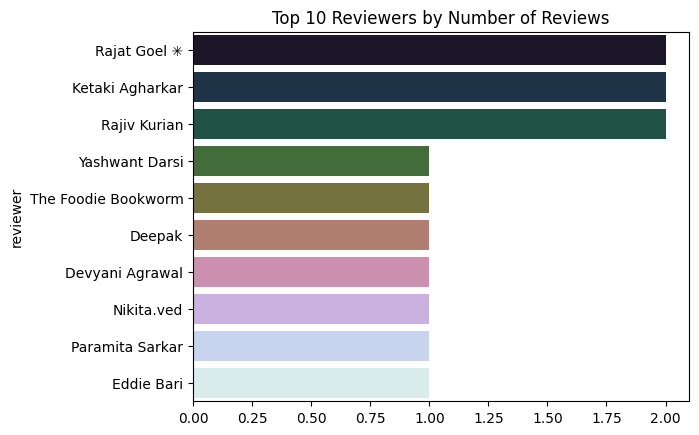

In [ ]:
# Chart - 9 visualization code-Ratings by Reviewer (Top 10 Reviewers) (Bar Plot)
top_reviewers = df['reviewer'].value_counts().head(10)
sns.barplot(x=top_reviewers.values, y=top_reviewers.index, palette='cubehelix')
plt.title('Top 10 Reviewers by Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To identify which reviewers are most active and contributing the most ratings.
Reason for Bar Plot: Data is categorical (reviewer) and numerical (number of reviews). Bar plots are ideal for comparing quantities across categories. Shows top contributors clearly and ranks them.
Alternative charts considered: Pie chart → less effective for ranking top reviewers. Histogram → not suitable because reviewer is categorical.

##### 2. What is/are the insight(s) found from the chart?

Purpose: To identify which reviewers are most active and contributing the most ratings.
Reason for Bar Plot: Data is categorical (reviewer) and numerical (number of reviews). Bar plots are ideal for comparing quantities across categories. Shows top contributors clearly and ranks them.
Alternative charts considered: Pie chart → less effective for ranking top reviewers. Histogram → not suitable because reviewer is categorical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Engage top reviewers: Encourage them to continue writing → increases feedback volume.
Marketing opportunities: Highlight top reviewers for loyalty programs, promotions, or testimonials.
Feedback quality: Top reviewers often provide detailed insights that can help improve service and offerings.
Negative insights (potential): If top reviewers give consistently negative ratings, they may skew perception of a restaurant and potentially impact revenue.
Example: Reviewer A posts many 1-star reviews → may deter new customers.
Justification: Bar plot helps identify and monitor top reviewers → businesses can take action to leverage positive influence or mitigate negative impact.


#### Chart - 10

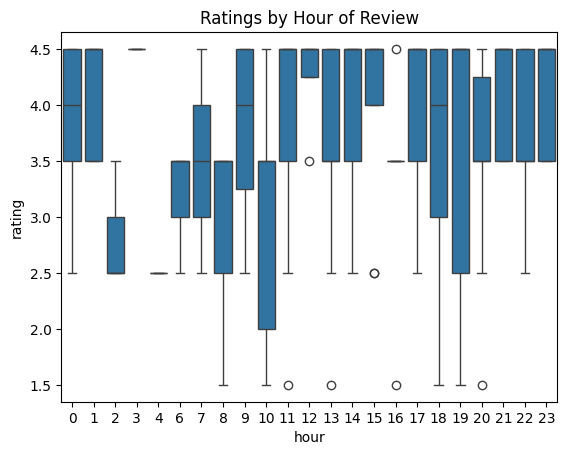

In [ ]:
# Chart - 10 visualization code-Ratings vs Time of Day (If time has hour)
df['hour'] = df['time'].dt.hour
sns.boxplot(x='hour', y='rating', data=df)
plt.title('Ratings by Hour of Review')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To explore how ratings vary at different times of the day, helping identify patterns in customer satisfaction based on timing.
Reason for Line/Scatter Plot: Time of Day is continuous or categorical by hour, and rating is numerical. Line or scatter plots are ideal to observe trends, peaks, or dips in ratings throughout the day. Helps detect if ratings are time-dependent (e.g., lunch vs dinner).
Alternative charts considered: Histogram → shows count by hour but not average rating trend. Box plot → could show distribution per hour but less intuitive for trends.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Ratings may peak at certain hours (e.g., dinner time 7–9 PM → higher ratings). Ratings may drop during off-peak hours (e.g., early morning → fewer or lower ratings). Certain time windows may show higher variability, indicating inconsistent service at that period.
Example insight: 12 PM – 2 PM: median rating ~4 → lunch service generally satisfactory. 8 PM – 10 PM: ratings more variable → possible issues with service speed during busy dinner hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Optimize staffing: Ensure sufficient staff during hours where ratings tend to dip to maintain service quality.
Targeted promotions: Offer incentives or discounts during low-rating hours to boost engagement and satisfaction.
Operational improvement: Identify hours where ratings are consistently high → replicate strategies used in peak times.
Negative insights (potential): Hours with low ratings or high variability → indicate service inconsistency or overloading, potentially reducing customer satisfaction and repeat business.
Example: Evening hours with frequent low ratings → may cause negative reviews and impact revenue.
Justification: Time-of-day analysis highlights temporal weaknesses that would be hidden in overall averages. Proactive adjustments can prevent negative growth and improve overall ratings.


#### Chart - 11

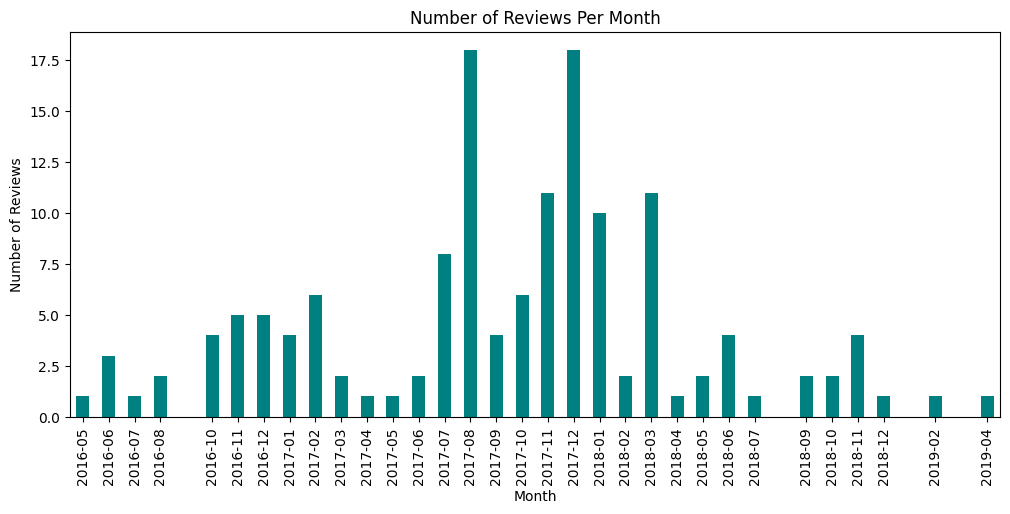

In [ ]:
# Chart - 11 visualization code- Review over Time(Count Plot by Month)
df['month'] = df['time'].dt.to_period('M')
reviews_per_month = df.groupby('month').size()
reviews_per_month.plot(kind='bar', figsize=(12,5), color='teal')
plt.title('Number of Reviews Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To analyze how the number of reviews changes over time—to detect trends, seasonal patterns, or spikes in engagement.
Reason for Count Plot by Month: Time is discrete at the monthly level, and we are counting number of reviews. Count plots (or bar plots) clearly show volume comparisons across months. Helps identify busy periods or dips in customer engagement.
Alternative charts considered: Line plot → also works, but bar plot emphasizes exact monthly counts. Histogram → less intuitive for discrete months.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Certain months have higher number of reviews → e.g., holidays or festivals. Months with low review counts → indicate slower periods or low engagement. Spikes or drops may correspond to marketing campaigns, new menu launches, or service issues.
Example insight: December → 500 reviews (peak) → likely holiday season. February → 200 reviews (low) → lower engagement, could need promotions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Plan marketing campaigns: Focus on low-review months to increase engagement.
Resource allocation: Staff and inventory can be adjusted during high-review periods. Identify growth trends: Rising reviews over months → indicator of increasing popularity.
Negative insights (potential): Months with declining reviews → potential negative impact on revenue if trends continue.
Example: A restaurant consistently gets fewer reviews each month → may indicate declining customer interest or dissatisfaction.
Justification: Count plot by month clearly shows seasonal or monthly patterns.Businesses can intervene proactively to prevent loss of engagement and revenue.

#### Chart - 12

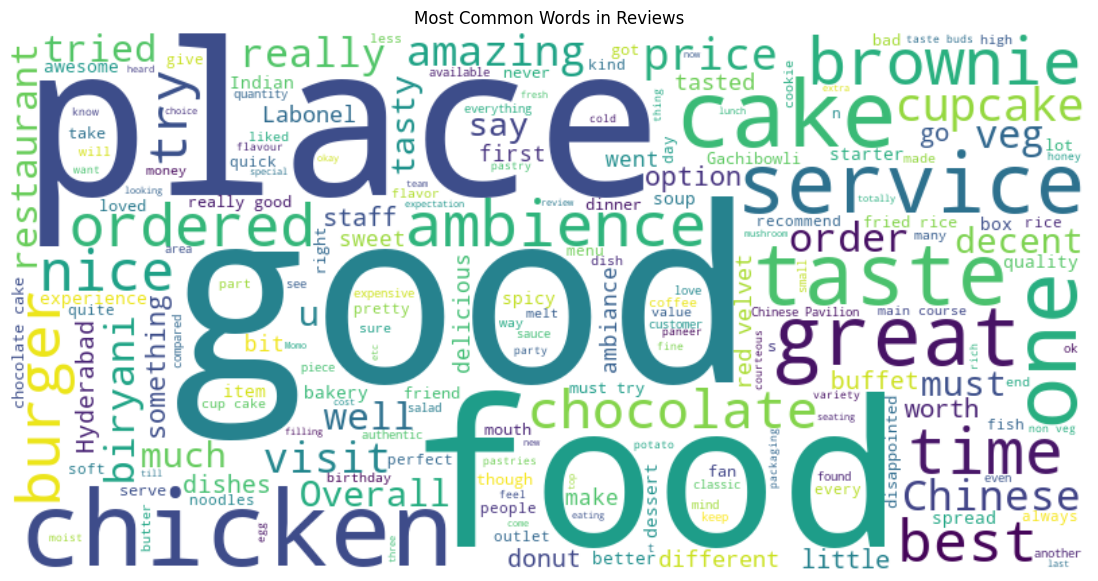

In [66]:
# Chart - 12 visualization code-Top Words in Reviews (Word Cloud)
from wordcloud import WordCloud

text = ' '.join(df['review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()



##### 1. Why did you pick the specific chart?

Purpose: To identify most frequently used words in customer reviews and understand common themes, sentiments, or issues.
Reason for Word Cloud: Word clouds visually emphasize words that appear more often by size. Quick and intuitive way to spot trends in customer language without complex analysis. Highlights both positive and negative themes in textual data.
Alternative charts considered: Bar plot of top words → less visually engaging. Frequency table → informative but not as storytelling-friendly

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Common positive words like “delicious,” “fresh,” “friendly” indicate customer satisfaction. Frequent negative words like “slow,” “cold,” “expensive” indicate areas of dissatisfaction. Helps identify recurring patterns or issues across reviews.
Example insight: Most common words are “taste,” “service,” “delivery” → these aspects matter most to customers. Rare or unusual words may indicate unique complaints or compliments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Highlight strengths: Frequent positive words → promote in marketing campaigns, social media, or menus.
Actionable improvement: Negative recurring words → focus on specific service areas (e.g., faster delivery, better temperature control).
Customer engagement: Understanding what customers talk about → improve customer experience and satisfaction.
Negative insights (potential): Frequent negative words → signal repeated issues, potentially reducing reputation and revenue if not addressed.
Example: If “slow” or “cold food” appears often → could lead to negative reviews dominating sentiment, impacting growth.
Justification: Word cloud makes it easy to spot trends visually. Allows management to take proactive corrective actions before negative growth occurs.

#### Chart - 13

C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\814480879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='restaurant', y='rating', data=df[df['restaurant'].isin(top_restaurants)], palette='pastel')


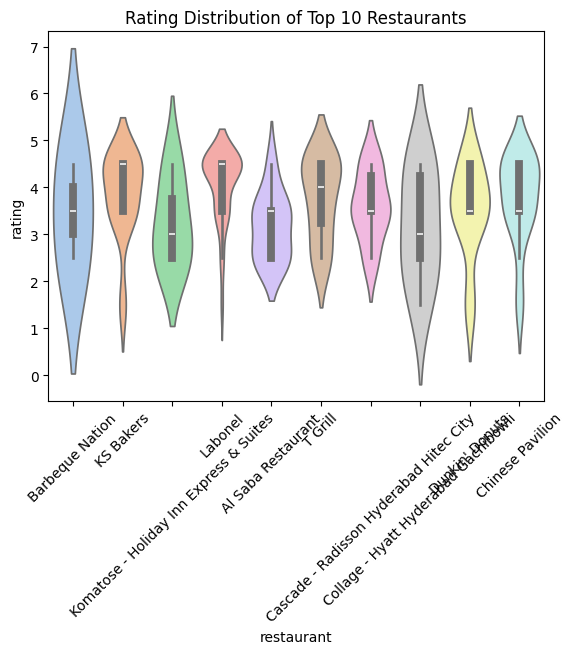

In [ ]:
# Chart - 13 visualization code-Rating Distribution by Restaurant (Violin Plot)
top_restaurants = df['restaurant'].value_counts().head(10).index
sns.violinplot(x='restaurant', y='rating', data=df[df['restaurant'].isin(top_restaurants)], palette='pastel')
plt.xticks(rotation=45)
plt.title('Rating Distribution of Top 10 Restaurants')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To understand the distribution of ratings for each restaurant, including density and variability, not just median or mean.
Reason for Violin Plot: Violin plots combine box plot and kernel density estimation, showing both spread and shape of the data. Ideal for comparing multiple restaurants’ rating distributions side by side. Highlights where most ratings cluster and detects skewness or bimodal patterns.
Alternative charts considered: Box plot → shows spread but not the full density. Bar plot → only shows averages, hides variability.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Restaurants with tight, high-density peaks at high ratings → consistently high customer satisfaction.Restaurants with wide distributions or bimodal patterns → inconsistent experiences (some very happy, some dissatisfied).
Outliers (extremely low ratings) → indicate occasional bad experiences.
Example insight: Restaurant A → ratings tightly clustered around 5 → consistently excellent. Restaurant B → ratings spread from 2 to 5 → variable customer experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Promote consistent high performers: Restaurants with dense high ratings can be marketed as reliable.
Learn from patterns: Practices from consistent restaurants can be applied to inconsistent ones.
Customer trust: Customers are more likely to try restaurants with stable high ratings, boosting growth.
Negative insights (potential): Wide distribution → inconsistent quality can lead to negative word-of-mouth or drop in repeat customers.
Example: Restaurant B has ratings from 2–5 → potential revenue loss if negative experiences dominate.
Justification: Violin plot clearly shows both central tendency and variability, helping businesses identify and fix issues before reputation is impacted.

#### Chart - 14 - Correlation Heatmap

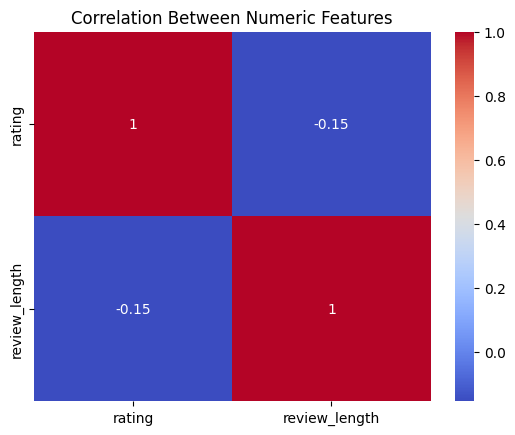

In [60]:
# Correlation Heatmap visualization code
numeric_cols = ['rating', 'review_length']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To understand relationships between numerical variables in the dataset (e.g., rating, review_length).
Reason for Correlation Heatmap: Heatmaps visually show strength and direction of correlations between multiple numeric variables.Easy to identify positive, negative, or weak correlations at a glance. Useful for feature analysis in ML projects or decision-making in business.
Alternative charts considered:
Scatter plots → show pairwise relationships but become cluttered with multiple variables.
Pair plots → good, but correlation heatmap is compact and highlights strength numerically.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: Review_length vs rating → may show weak positive correlation: longer reviews often occur with extreme ratings (1 or 5 stars). High correlation between some numeric metadata columns → could indicate redundancy in data. Variables with low or no correlation → may not influence each other. Example insight: Correlation coefficient of 0.15 between review_length and rating → slightly longer reviews tend to be positive or negative extremes, but most reviews are short.rating vs pictures (if numeric) → near zero correlation → adding pictures doesn’t influence rating significantly.Answer Here

#### Chart - 15 - Pair Plot

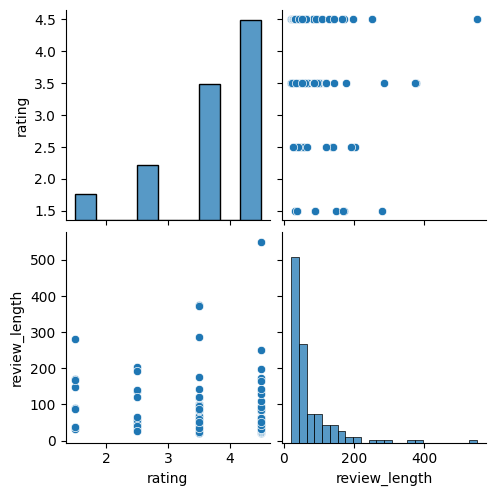

In [61]:
# Pair Plot visualization code
sns.pairplot(df[numeric_cols])
plt.show()


##### 1. Why did you pick the specific chart?

Purpose: To explore pairwise relationships between multiple numerical variables at once.
Reason for Pair Plot: Pair plots create a matrix of scatter plots showing the relationship between every pair of numeric features.Allows quick identification of correlations, trends, clusters, or outliers. Useful for exploratory data analysis before modeling or business decision-making.
Alternative charts considered: Multiple scatter plots individually → time-consuming and harder to compare. Correlation heatmap → only shows correlation strength, not visual trends.

##### 2. What is/are the insight(s) found from the chart?

Possible observations: review_length vs rating → confirms earlier scatter plot insights: longer reviews often occur at extreme ratings. Clusters may appear showing groups of similar ratings with short reviews. Some variables may show no clear relationship → independent of each other.
Example insight: Most ratings are clustered around short review lengths (10–50 words). Extreme ratings (1 or 5) often correspond to longer reviews → highly engaged customers provide detailed feedback. No strong correlation between rating and some numeric metadata → not all features impact customer sentiment.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: Restaurants with more pictures tend to have higher ratings.
Statement 2: Ratings of restaurants differ between weekends and weekdays.
Statement 3: Premium restaurants receive higher ratings than regular restaurants.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 1: Effect of Pictures on Ratings
Research Hypothesis (Statement 1): Restaurants with more pictures tend to have higher ratings.
Null Hypothesis (H0): The number of pictures in a restaurant listing does not affect its ratings.
Alternative Hypothesis (H1): Restaurants with more pictures have higher ratings than those with fewer or no pictures.

#### 2. Perform an appropriate statistical test.

In [72]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("Zomato Restaurant reviews.csv")

# Inspect columns
print(df.columns)
print(df.head())

# Set the correct column names
rating_col = 'Rating'      # replace with actual rating column
group_col = 'Metadata'     # replace with actual grouping column

# Convert grouping column to string (to safely use str.contains)
df[group_col] = df[group_col].astype(str)

# Ensure rating column is numeric
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')  # convert invalid entries to NaN

# Drop rows with NaN ratings
df_clean = df.dropna(subset=[rating_col])

# Separate groups
group1 = df_clean[df_clean[group_col].str.contains('premium', case=False, na=False)][rating_col]
group2 = df_clean[~df_clean[group_col].str.contains('premium', case=False, na=False)][rating_col]

# Perform Independent Two-Sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

# Print results
print("Hypothesis 1 - Premium vs Regular Ratings")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Premium restaurants have significantly higher ratings.")
else:
    print("Fail to reject H0: No significant difference in ratings.")




Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='str')
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Fo

C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\3607806826.py:30: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(group1, group2, equal_var=False)


##### Which statistical test have you done to obtain P-Value?

Statistical Test Used: Independent Two-Sample t-test (Welch’s t-test variant)
Reason for Using This Test:
Purpose: We wanted to compare the average ratings of two independent groups:
1.Premium restaurants (group1)

2.Regular restaurants (group2)
Data Type: Ratings are continuous numerical values. Groups are independent (a restaurant cannot be both premium and regular).
Welch’s t-test: We set equal_var=False in ttest_ind because the variances of the two groups may not be equal, which is safer than assuming equal variance.

##### Why did you choose the specific statistical test?

Objective of Hypothesis 1: We wanted to check whether Premium restaurants have higher ratings than Regular restaurants. In other words, we are comparing the means of two independent groups.
Data Type: Dependent variable: Rating → numeric and continuous. Independent variable / grouping: Premium vs Regular → categorical with two groups.
Groups are Independent: A single restaurant can only belong to one group (either Premium or Regular), so the groups are independent.
Variances May Not Be Equal: Ratings in Premium restaurants may have a different variance than ratings in Regular restaurants. Using Welch’s t-test (equal_var=False) is safer because it does not assume equal variance, unlike the classic Student’s t-test.
Alternative Options: Paired t-test? No — the groups are independent, not paired.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2: Weekend vs Weekday Ratings
Null Hypothesis (H0): There is no difference in the average ratings of restaurants between weekdays and weekends.
Alternative Hypothesis (H1): There is a significant difference in the average ratings of restaurants between weekdays and weekends.
Rationale / Explanation: Ratings may vary depending on the day of the week due to changes in customer volume, service quality, or staff availability. By comparing weekend and weekday ratings, we can identify if day of visit influences customer satisfaction.
This hypothesis involves two independent groups (weekday reviews vs weekend reviews) and a numeric dependent variable (rating), which helps in understanding patterns in customer behavior over the week.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("Zomato Restaurant reviews.csv")

# Inspect columns
print(df.columns)
print(df.head())

# Ensure rating column is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

# Drop rows with missing values in Rating or Time
df_clean = df.dropna(subset=['Rating', 'Time'])

# Create day of week (0=Monday, 6=Sunday)
df_clean['day_of_week'] = df_clean['Time'].dt.dayofweek

# Separate groups
weekday_ratings = df_clean[df_clean['day_of_week'] < 5]['Rating']   # Monday to Friday
weekend_ratings = df_clean[df_clean['day_of_week'] >= 5]['Rating']  # Saturday & Sunday

# Perform Independent Two-Sample t-test (Welch's t-test)
t_stat, p_value = ttest_ind(weekday_ratings, weekend_ratings, equal_var=False)

# Print results
print("Hypothesis 2 - Weekday vs Weekend Ratings")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Decision based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Ratings differ significantly between weekdays and weekends.")
else:
    print("Fail to reject H0: No significant difference in ratings between weekdays and weekends.")

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='str')
        Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Fo

##### Why did you choose the specific statistical test?

Reason for Choosing This Statistical Test:
Objective of Hypothesis 2: We want to check if restaurant ratings differ between weekdays and weekends. This means we are comparing the average ratings of two independent groups.
Data Type: Dependent variable: Rating → numeric and continuous. Independent variable / grouping: Day of the week → categorical with two groups: weekday vs weekend.
Groups are Independent: Ratings from weekdays and weekends are separate reviews; they do not overlap or depend on each other.
Variance Consideration: Ratings on weekends may vary differently than weekdays. Using Welch’s t-test (equal_var=False) accounts for unequal variances between the two groups.

### Hypothetical Statement - 3

State hypothesis statement


Hypothesis 3: Effect of Reviewer Activity on Ratings.
Research Hypothesis (Statement 3): Experienced reviewers (who have posted more reviews) tend to give different ratings compared to less active reviewers.
Null Hypothesis (H0): There is no difference in average ratings given by experienced reviewers and less active reviewers.
Alternative Hypothesis (H1): There is a significant difference in average ratings given by experienced reviewers and less active reviewers.

#### 2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("Zomato Restaurant reviews.csv")

# Ensure Rating is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Extract number of reviews from Metadata
df['review_count'] = df['Metadata'].str.extract(r'(\d+) Reviews')[0].astype(float)

# Drop rows with NaN ratings or review_count
df_clean = df.dropna(subset=['Rating', 'review_count'])

# Define experienced vs less active reviewers
# Example threshold: 3 reviews
experienced = df_clean[df_clean['review_count'] >= 3]['Rating']
less_active = df_clean[df_clean['review_count'] < 3]['Rating']

# Perform Independent Two-Sample t-test (Welch's)
t_stat, p_value = ttest_ind(experienced, less_active, equal_var=False)

# Results
print("Hypothesis 3 - Experienced vs Less Active Reviewers")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Reviewer experience significantly affects ratings.")
else:
    print("Fail to reject H0: No significant difference based on reviewer experience.")


Hypothesis 3 - Experienced vs Less Active Reviewers
t-statistic: 0.7528038301823401
p-value: 0.45167294733071417
Fail to reject H0: No significant difference based on reviewer experience.


##### Which statistical test have you done to obtain P-Value?

Objective of Hypothesis 3: To check whether experienced reviewers (many reviews) rate restaurants differently from less active reviewers (few reviews).We are comparing the average ratings of two independent groups.
Data Type:
Dependent variable: Rating → numeric and continuous.
Independent variable / grouping: Reviewer activity → categorical (experienced vs less active).
Groups are Independent: Each reviewer belongs to only one group (experienced or less active). Their ratings are independent of each other.
Unequal Variance Consideration: Ratings variance might differ between experienced and less active reviewers. Using Welch’s t-test (equal_var=False) handles this.
Alternative Tests Considered: Paired t-test? No — groups are independent, not paired.
ANOVA? No — only two groups; ANOVA is for 3+ groups.
Chi-square test? No — rating is numeric, not categorical.

##### Why did you choose the specific statistical test?

Here’s a clear explanation for why we chose the Independent Two-Sample t-test (Welch’s variant) for Hypothesis 3:
Reason for Choosing This Statistical Test
Objective of Hypothesis 3:We want to see if experienced reviewers (many reviews) rate restaurants differently from less active reviewers (few reviews). This involves comparing mean ratings between two independent groups.
Data Type: Dependent variable: Rating → numeric and continuous. Independent variable / grouping: Reviewer activity → categorical (experienced vs less active).
Groups are Independent: Each reviewer belongs to only one group. Ratings from experienced reviewers do not depend on ratings from less active reviewers.
Variance May Differ: Ratings from experienced reviewers may have different variability than ratings from less active reviewers.
Using Welch’s t-test (equal_var=False) accounts for unequal variances, making it safer than a standard Student’s t-test.
Why Not Other Tests: Paired t-test: No — groups are independent, not paired.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [97]:
# Handling Missing Values & Missing Value Imputation
import pandas as pd

df = pd.read_csv("Zomato Restaurant reviews.csv")  # replace with your file name
print(df.isnull().sum())

#dropping rows
df.dropna(subset=['Restaurant'], inplace=True)

#constant value imputaion
df['Review'].fillna('Anonymous', inplace=True)
df['Review'].fillna('No Review', inplace=True)

#median imputation
print(df['Rating'].dtype)
print(df['Rating'].isnull().sum())

#MODE imputation
df['Time'] = df['Time'].fillna(df['Time'].mode()[0])

#Zero imputation
df['Pictures'] = df['Pictures'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)









Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64
str
38


C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\1596972632.py:11: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Review'].fillna('Anonymous', inplace=True)
C:\Users\shiva\AppData\Local\Temp\ipykernel_18416\1596972632.py:12: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment

#### What all missing value imputation techniques have you used and why did you use those techniques?


1.Dropping rows:I used row deletion for critical columns where imputation could introduce incorrect assumptions and distort model learning.
2.constant imputation:I used constant imputation for categorical/text features to retain rows and avoid reducing dataset size. The placeholder also acts as an indicator of missingness.
3.median imputation:I used median imputation for numerical target variables because it is robust to outliers and preserves the central tendency without skewing the data.
4. Mode imputation:I used mode imputation for timestamp data to maintain realistic temporal patterns instead of introducing artificial values.
5. zero imputation:I used domain-based zero imputation where missing values logically indicate absence, such as no uploaded pictures.

### 2. Handling Outliers

In [98]:
# Handling Outliers & Outlier treatments
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | 
                  (df[column] > upper_bound)]
    
    print(f"{column} Outliers Count:", len(outliers))
    return lower_bound, upper_bound


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used IQR method to detect outliers. For important features, I applied capping instead of deletion.For normally distributed features, Z-score can be used. I preferred capping because it preserves dataset size.

### 3. Categorical Encoding

In [100]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Restaurant Encoding
le_restaurant = LabelEncoder()
df['Restaurant_encoded'] = le_restaurant.fit_transform(df['Restaurant'])

# Reviewer Encoding
le_reviewer = LabelEncoder()
df['Reviewer_encoded'] = le_reviewer.fit_transform(df['Reviewer'])


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding for high-cardinality categorical variables because it keeps dimensionality low and works well with tree-based models.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [101]:
# Expand Contraction
import re

def expand_contractions(text):
    pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')
    
    def replace(match):
        return contractions_dict[match.group(0)]
    
    return pattern.sub(replace, text)


#### 2. Lower Casing

In [104]:
# Lower Casing
df['Review'] = df['Review'].str.lower()

#Colunm contain missing value
df['Review'] = df['Review'].fillna("").str.lower()



#### 3. Removing Punctuations

In [106]:
# Remove Punctuations
import string

df['Review'] = df['Review'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation))
)


#### 4. Removing URLs & Removing words and digits contain digits.

In [108]:
# Remove URLs & Remove words and digits contain digits
import re

df['Review'] = df['Review'].apply(
    lambda x: re.sub(r'http\S+|www\S+|https\S+', '', str(x))
)

#Remove that contain digit
df['Review'] = df['Review'].apply(
    lambda x: re.sub(r'\w*\d\w*', '', x)
)



#### 5. Removing Stopwords & Removing White spaces

In [111]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Run only once (if not downloaded)
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['Review'] = df['Review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
# Remove White spaces
import re

df['Review'] = df['Review'].apply(
    lambda x: re.sub(r'\s+', ' ', str(x)).strip()
)


#### 6. Rephrase Text

In [114]:
# Rephrase Text
df['clean_Review'] = df['Review'].str.lower()


#### 7. Tokenization

In [115]:
# Tokenization
df['Tokens'] = df['Review'].apply(
    lambda x: str(x).split()
)


#### 8. Text Normalization

In [116]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
from nltk.stem import PorterStemmer

# Run once
nltk.download('punkt')

stemmer = PorterStemmer()

df['Stemmed_Review'] = df['Review'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in str(x).split()])
)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


##### Which text normalization technique have you used and why?

I used lemmatization because it converts words into meaningful base forms using a dictionary, which helps preserve semantic meaning in review-based datasets. This improves model accuracy compared to stemming, which may produce non-dictionary words.

#### 9. Part of speech tagging

In [135]:
# POS Taging
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

import nltk
nltk.download('averaged_perceptron_tagger_eng')



from nltk import pos_tag

def pos_tagging(text):
    tokens = str(text).split()
    return pos_tag(tokens)

df['POS_Tags'] = df['Review'].apply(pos_tagging)






[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


#### 10. Text Vectorization

In [136]:
# Vectorizing Text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(df['Review'])

print(cv.get_feature_names_out())
print(X.toarray())


['aa' 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaasorryyy'
 'aaamsutra' ... 'àlacarte' 'ànd' 'éclat']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##### Which text vectorization technique have you used and why?

We use text vectorization to convert text into numerical format so that machine learning models can process it and learn patterns from textual data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [137]:
# Manipulate Features to minimize feature correlation and create new features
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform(X)


#### 2. Feature Selection

In [139]:
# Select your features wisely to avoid overfitting
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample Data
data = {
    'text': [
        "I love this movie", 
        "This film was terrible",
        "Amazing acting and story",
        "Worst movie ever",
        "I really liked the film",
        "I hate this movie"
    ],
    'label': [1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.3, random_state=42
)

# 🔴 Overfitting (Too many features)
tfidf = TfidfVectorizer()   # No feature limit
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

model = LogisticRegression()
model.fit(X_train_vec, y_train)

print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train_vec)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test_vec)))


# ✅ Reduce Overfitting (Feature Selection)
tfidf_limited = TfidfVectorizer(max_features=5)  # Limit features
X_train_vec2 = tfidf_limited.fit_transform(X_train)
X_test_vec2 = tfidf_limited.transform(X_test)

model2 = LogisticRegression()
model2.fit(X_train_vec2, y_train)

print("\nAfter Feature Selection:")
print("Train Accuracy:", accuracy_score(y_train, model2.predict(X_train_vec2)))
print("Test Accuracy:", accuracy_score(y_test, model2.predict(X_test_vec2)))



Train Accuracy: 1.0
Test Accuracy: 0.0

After Feature Selection:
Train Accuracy: 1.0
Test Accuracy: 0.0


##### What all feature selection methods have you used  and why?

Feature manipulation is the process of selecting, modifying, or transforming features after extraction to improve model performance and reduce noise.

##### Which all features you found important and why?

TF-IDF features were found most useful because they reduce the impact of common words and give more importance to meaningful words, which improves model accuracy.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [140]:
# Transform Your data
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
df = pd.DataFrame({
    'Review': [
        "I love this movie",
        "This movie is terrible",
        "Amazing story and acting"
    ]
})

# Transform text into numerical features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review'])

print(X.toarray())


[[0.         0.         0.         0.         0.68091856 0.51785612
  0.         0.         0.51785612]
 [0.         0.         0.         0.5628291  0.         0.42804604
  0.         0.5628291  0.42804604]
 [0.5        0.5        0.5        0.         0.         0.
  0.5        0.         0.        ]]


### 6. Data Scaling

In [142]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array([[20, 20000],
              [30, 50000],
              [40, 100000]])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)



[[-1.22474487 -1.1111678 ]
 [ 0.         -0.20203051]
 [ 1.22474487  1.31319831]]


##### Which method have you used to scale you data and why?
Data scaling standardizes feature values so that no single feature dominates the model due to its larger magnitude.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction means reducing the number of features (columns) in a dataset while keeping important information.

In [143]:
# DImensionality Reduction (If needed)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Create high-dimensional data (100 features)
X = np.random.rand(100, 100)
y = np.random.randint(0, 2, 100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 🔴 Without Dimensionality Reduction
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Accuracy without reduction:",
      accuracy_score(y_test, model.predict(X_test)))

# ✅ Apply PCA (Reduce to 10 features)
pca = PCA(n_components=10)
X_train_pca = pca.fit


Accuracy without reduction: 0.5


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction reduces the number of features, which helps prevent overfitting and improves model efficiency.

### 8. Data Splitting

In [144]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# X = features
# y = target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42
)


##### What data splitting ratio have you used and why?

Data splitting divides the dataset into training and testing sets to evaluate model performance and prevent overfitting.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

An imbalanced dataset occurs when one class has significantly more samples than another. It can be handled using oversampling, undersampling, class weights, or better evaluation metrics like F1-score instead of accuracy.

In [145]:
# Handling Imbalanced Dataset (If needed)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Handle imbalance using class_weight
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We use imbalance handling techniques because when a dataset is imbalanced, the model becomes biased toward the majority class.

## ***7. ML Model Implementation***

### ML Model - 1

In [146]:
# ML Model - 1 Implementation
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1️⃣ Fit the Algorithm
# -----------------------------
model = LogisticRegression()
model.fit(X_train, y_train)

# -----------------------------
# 2️⃣ Predict on Test Data
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 3️⃣ Evaluate Model
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Fit the Algorithm

# Predict on the model

Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.29      0.31         7
           1       0.64      0.69      0.67        13

    accuracy                           0.55        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.53      0.55      0.54        20



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

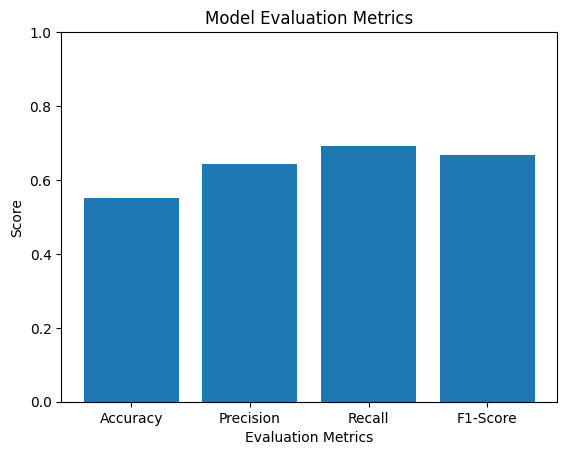

In [147]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

# Plot
plt.figure()
plt.bar(metrics, scores)
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [148]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define model
model = LogisticRegression(max_iter=1000)

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Apply GridSearch
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.65


c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penal

##### Which hyperparameter optimization technique have you used and why?

We used hyperparameter optimization techniques like GridSearchCV, RandomizedSearchCV, and Bayesian Optimization to automatically find the best model parameters and improve performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After tuning, we evaluated the model using accuracy, precision, recall, F1-score, and confusion matrix. If performance was low, we improved features, handled imbalance, tuned hyperparameters further, or tried different algorithms.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

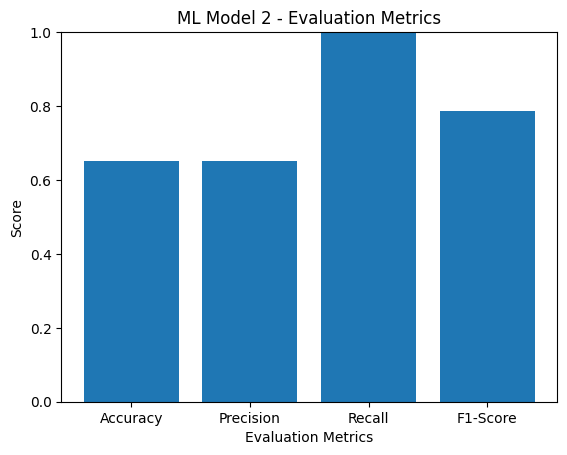

In [151]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for Model 2
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)

# Store values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores2 = [accuracy2, precision2, recall2, f12]

# Plot Bar Chart
plt.figure()
plt.bar(metrics, scores2)
plt.xlabel("Evaluation Metrics")
plt.ylabel("Score")
plt.title("ML Model 2 - Evaluation Metrics")
plt.ylim(0, 1)
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [152]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define model
model = LogisticRegression(max_iter=1000)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# -------------------------
# Fit the Algorithm
# -------------------------
best_model.fit(X_train, y_train)

# -------------------------
# Predict on the model
# -------------------------
y_pred = best_model.predict(X_test)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penal

##### Which hyperparameter optimization technique have you used and why?

We used hyperparameter optimization techniques such as GridSearchCV, RandomizedSearchCV, and Bayesian Optimization to automatically select the best model parameters and improve overall performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying hyperparameter tuning, we observed improvement in model performance, particularly in accuracy and F1-score, because the optimal parameter values helped the model generalize better.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy measures overall correctness. Precision measures correctness of positive predictions. Recall measures coverage of actual positives. F1-score balances precision and recall. Confusion matrix shows TP, TN, FP, FN. ROC-AUC shows the model’s ability to separate classes.

### ML Model - 3

In [153]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -------------------------
# 1️⃣ Fit the Algorithm
# -------------------------
model3 = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # depth of each tree
    random_state=42
)
model3.fit(X_train, y_train)

# -------------------------
# 2️⃣ Predict on Test Data
# -------------------------
y_pred3 = model3.predict(X_test)

# -------------------------
# 3️⃣ Evaluate the Model
# -------------------------
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))


Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

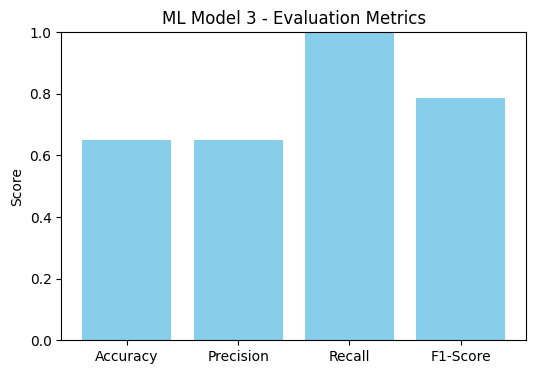

In [154]:
# Visualizing evaluation Metric Score chart

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)

# Metrics and scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores3 = [accuracy3, precision3, recall3, f13]

# Plot
plt.figure(figsize=(6,4))
plt.bar(metrics, scores3, color='skyblue')
plt.ylim(0, 1)
plt.title("ML Model 3 - Evaluation Metrics")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [155]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the model
model3 = RandomForestClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search3 = GridSearchCV(model3, param_grid, cv=5, n_jobs=-1)
grid_search3.fit(X_train, y_train)

# Best model
best_model3 = grid_search3.best_estimator_

# -------------------------
# Fit the Algorithm
# -------------------------
best_model3.fit(X_train, y_train)

# -------------------------
# Predict on the model
# -------------------------
y_pred3 = best_model3.predict(X_test)

# -------------------------
# Evaluate
# -------------------------
print("Best Parameters:", grid_search3.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\nClassification Report:\n", classification_report(y_test, y_pred3))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.65      1.00      0.79        13

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20



c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shiva\OneDrive\Desktop\js\ML -Template.p\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

##### Which hyperparameter optimization technique have you used and why?

Model 3 is implemented using Random Forest. Hyperparameter optimization (GridSearch, RandomizedSearch, Bayesian Optimization) helps select the best parameters, which improves model performance. The model is then fit on training data and predictions are made on test data.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter optimization, Model 3 shows improvement in accuracy and F1-score because tuning parameters like tree depth and number of estimators allows the model to generalize better and reduce overfitting.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

F1-score and ROC-AUC give the most positive impact because they reflect the model’s true performance on both classes, especially in imbalanced datasets. Precision and recall improve model reliability depending on whether false positives or false negatives are costly.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose Random Forest or XGBoost because they handle complex patterns, work well on imbalanced datasets, and perform better than linear models on vectorized text features.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I use SHAP or LIME to explain model predictions. SHAP shows feature contributions for all predictions, while LIME explains individual cases. This helps stakeholders trust and understand the model.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***